In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#Uma análise e geração de relatório com Python
#https://www.youtube.com/watch?v=CvhZaDpBQsg&list=PLP_dh3S9H39kNe5wZ3PTMYqkGZHkn8FGQ&index=3

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
data_inicio = pd.to_datetime("2019-01-01")
data_fim = pd.to_datetime("2023-12-31")

#captura dos dados
carteira = yf.download(["BPAC11.SA","ITUB3.SA","VALE3.SA","EGIE3.SA","WEGE3.SA"],start=data_inicio,end=data_fim)["Adj Close"]


[*********************100%%**********************]  5 of 5 completed


<Axes: xlabel='Date'>

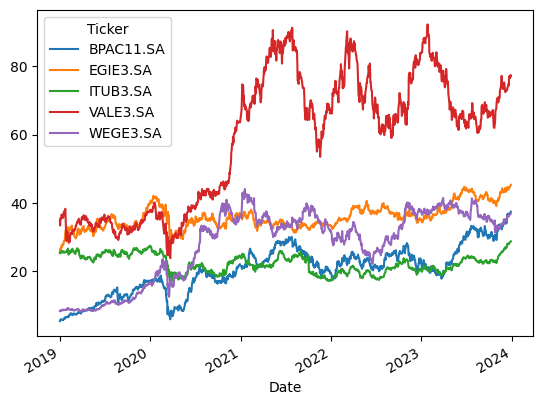

In [3]:
#carteira.head()
carteira.plot()

In [4]:
apple = carteira.ffill(axis = 0)

<Axes: xlabel='Date'>

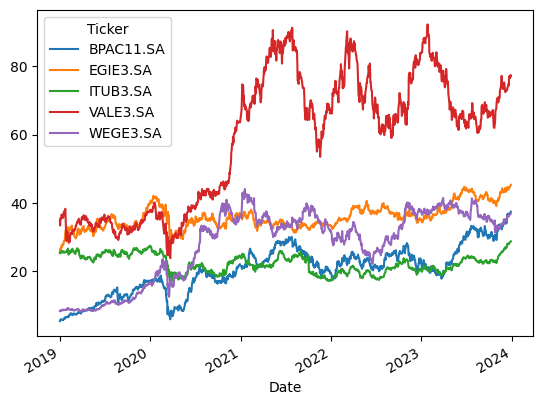

In [5]:
apple.plot()

In [6]:
apple_normalizado = apple/apple.iloc[0]
#1 real inicial investido teria se transformado em X
apple_normalizado

Ticker,BPAC11.SA,EGIE3.SA,ITUB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.041366,1.032806,1.009074,0.959092,1.022804
2019-01-04,1.078313,1.040422,0.992178,1.021531,1.034483
2019-01-07,1.100402,1.033978,1.005006,1.016050,1.018354
2019-01-08,1.079910,1.045694,1.007510,1.025837,1.010011
...,...,...,...,...,...
2023-12-21,6.660759,1.732978,1.100352,2.208605,4.336122
2023-12-22,6.686195,1.738741,1.108970,2.191962,4.350421
2023-12-26,6.775224,1.747323,1.121897,2.199710,4.375444


<Axes: xlabel='Date'>

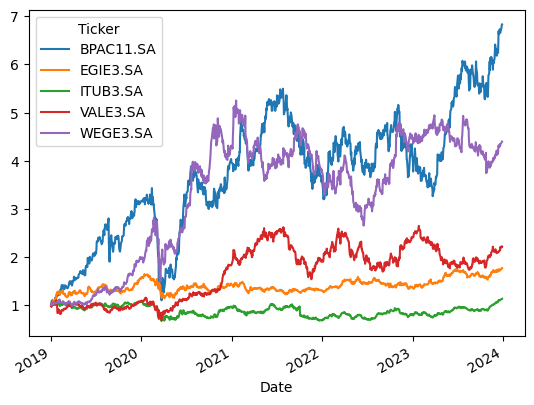

In [7]:
(apple/apple.iloc[0]).plot()

#Criando rotina para várias janelas de tempo

In [16]:
datas_inicio = ["2019-01-01","2021-01-01","2023-01-01"]

In [14]:
def compara_ativos(inicio):
  carteira = yf.download(["BPAC11.SA","ITUB3.SA","VALE3.SA","EGIE3.SA","WEGE3.SA"],start=inicio)["Adj Close"]
  carteira = carteira.ffill(axis = 0)
  #carteira = carteira.dropna()
  carteira = carteira/carteira.iloc[0]
  carteira.plot(figsize=(10, 6))

In [17]:
datas_inicio = ["2019-01-01","2021-01-01","2023-01-01"]

[*********************100%%**********************]  5 of 5 completed


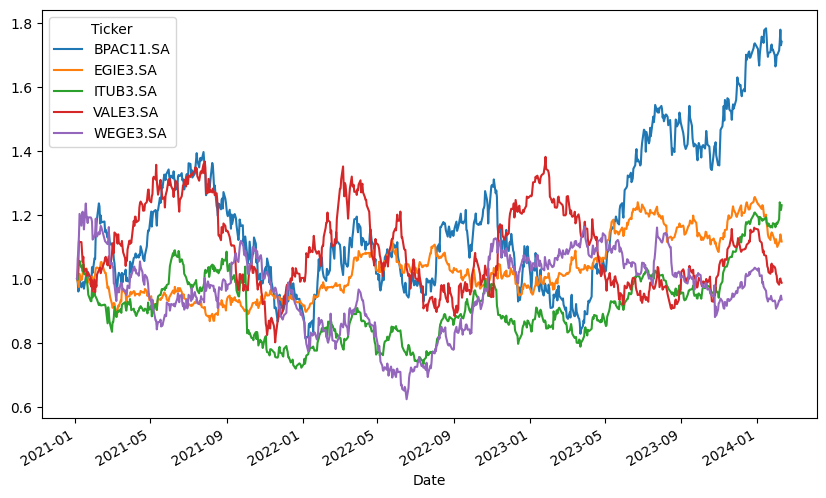

In [15]:
compara_ativos(data_inicio[1])

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


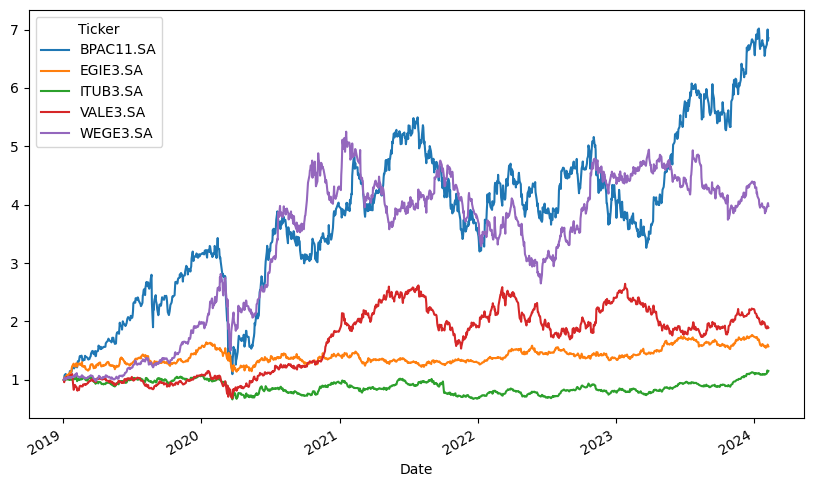

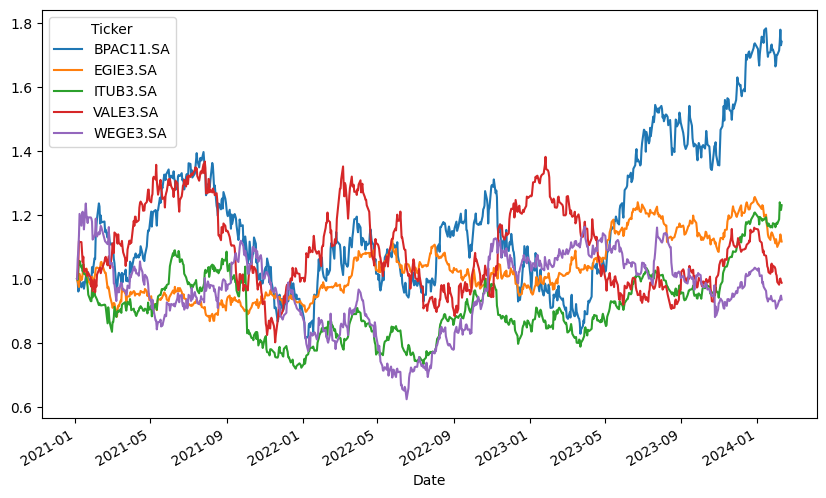

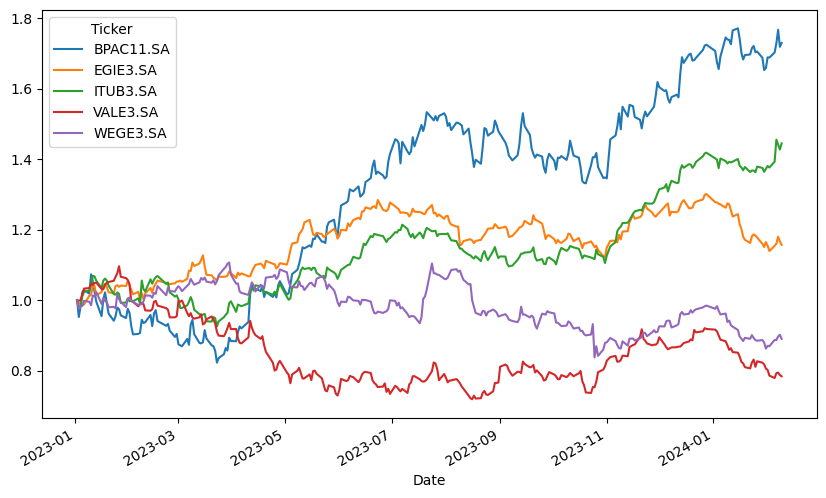

In [20]:
#criando loop para geração do relatorio
relatorio = PdfPages("relatorio_minhas_acoes.pdf")

for data in datas_inicio:
  relatorio.savefig(compara_ativos(data))

relatorio.close()

In [30]:
#mensurar impacto do cambio
data_inicio = pd.to_datetime("2019-01-01")
data_fim = pd.to_datetime("2023-12-31")

#captura dos dados
dados = yf.download(["AAPL","AAPL34.SA","USDBRL=X"],start=data_inicio,end=data_fim)["Adj Close"]
dados = dados.ffill(axis = 0)

[*********************100%%**********************]  3 of 3 completed


In [31]:
dados.head()

Ticker,AAPL,AAPL34.SA,USDBRL=X
Date,,,
2019-01-01,NaN,NaN,3.8800
2019-01-02,37.845039,7.242282,3.8799
2019-01-03,34.075401,6.449839,3.7863
2019-01-04,35.530045,6.552942,3.7551
2019-01-07,35.450974,6.539753,3.6612


In [37]:
dados["apple_reais"] = dados["AAPL"] * dados["USDBRL=X"]
dados = dados.dropna()
dados.head()

Ticker,AAPL,AAPL34.SA,USDBRL=X,apple_reais
Date,,,,
2019-01-02,37.845039,7.242282,3.8799,146.834967
2019-01-03,34.075401,6.449839,3.7863,129.019690
2019-01-04,35.530045,6.552942,3.7551,133.418871
2019-01-07,35.450974,6.539753,3.6612,129.793106
2019-01-08,36.126770,6.736366,3.7341,134.900976


In [38]:
#normalizar todo o dataframe
dados_normalizado = dados/dados.iloc[0]
dados_normalizado

Ticker,AAPL,AAPL34.SA,USDBRL=X,apple_reais
Date,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.900393,0.890581,0.975876,0.878671
2019-01-04,0.938830,0.904817,0.967834,0.908631
2019-01-07,0.936740,0.902996,0.943633,0.883939
2019-01-08,0.954597,0.930144,0.962422,0.918725
...,...,...,...,...
2023-12-25,5.109079,6.483906,1.255147,6.412644
2023-12-26,5.094564,6.416308,1.255121,6.394294
2023-12-27,5.097203,6.416308,1.240625,6.323716


<Axes: xlabel='Date'>

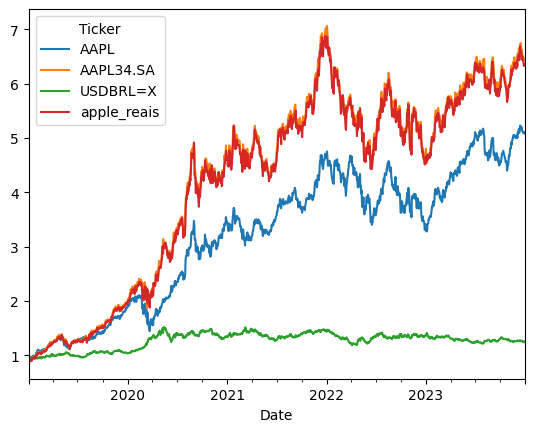

In [39]:
dados_normalizado.plot()